<a href="https://colab.research.google.com/github/usman-shahbaz/exploratory-data-analysis-tasks/blob/main/Exploratory_Data_Analysis_Task_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
from wordcloud import WordCloud
import re


##Q.1: Show column names and have a look at their info.

In [30]:
df = pd.read_csv('instagram_data.csv', encoding='latin1')

print("Column names and info:")
print(df.info())


Column names and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None


##Q.2: Show the descriptive statistics of the data.

In [31]:
print("Descriptive statistics:")
print(df.describe())


Descriptive statistics:
        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205

##Q.3: Check if your data contains any missing values.

In [32]:
print("Missing values check:")
print(df.isnull().sum())


Missing values check:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


##Q.4: Have a look at the distribution of the Impressions in dataset.

In [33]:
fig = px.histogram(df, x='Impressions', title='Distribution of Impressions')
fig.show()


##Q.5: Have a look at the number of impressions on each post over time.

In [34]:
fig = px.line(df, x=df.index, y='Impressions', title='Number of Impressions Over Time')
fig.show()


##Q.6: Have a look at all the metrics like Likes, Saves, and Follows from each post over time.

In [35]:
fig_likes = px.line(df, x=df.index, y='Likes', title='Likes Over Time')
fig_saves = px.line(df, x=df.index, y='Saves', title='Saves Over Time')
fig_follows = px.line(df, x=df.index, y='Follows', title='Follows Over Time')

fig_likes.show()
fig_saves.show()
fig_follows.show()


##Q.7: Have a look at the distribution of reach from different sources.

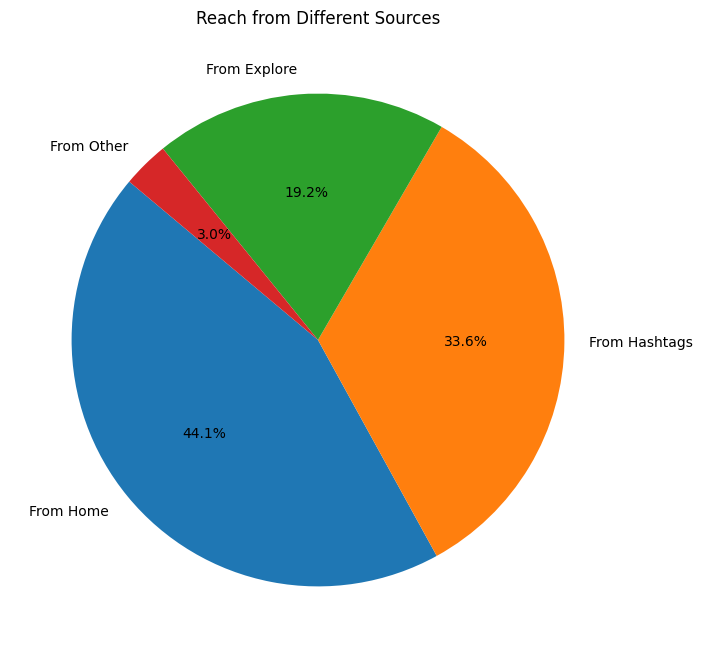

In [36]:
engagement_sources_sum = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

plt.figure(figsize=(8, 8))
plt.pie(engagement_sources_sum, labels=engagement_sources_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Reach from Different Sources')
plt.show()


##Q.8: Have a look at the distribution of engagement sources.

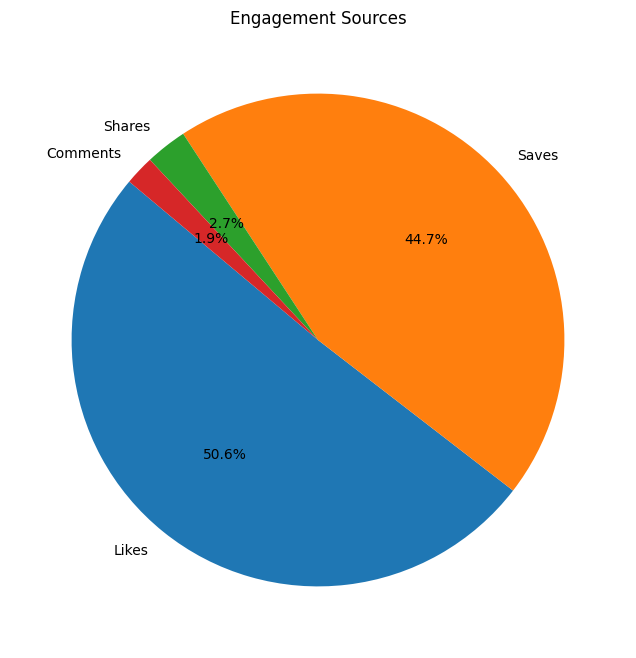

In [37]:
engagement_sources_sum = df[['Likes', 'Saves', 'Shares', 'Comments']].sum()

plt.figure(figsize=(8, 8))
plt.pie(engagement_sources_sum, labels=engagement_sources_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Engagement Sources')
plt.show()


##Q.9: Have a look at the relationship between the number of profile visits and follows.

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Profile Visits'], y=df['Follows'],
                    mode='markers',
                    marker=dict(color='skyblue'),
                    name='Profile Visits vs Follows'))

fig.update_layout(title='Relationship between Profile Visits and Follows',
                  xaxis_title='Profile Visits',
                  yaxis_title='Follows')

fig.show()


##Q.10: Have a look at the type of hashtags used in the posts using a wordcloud.

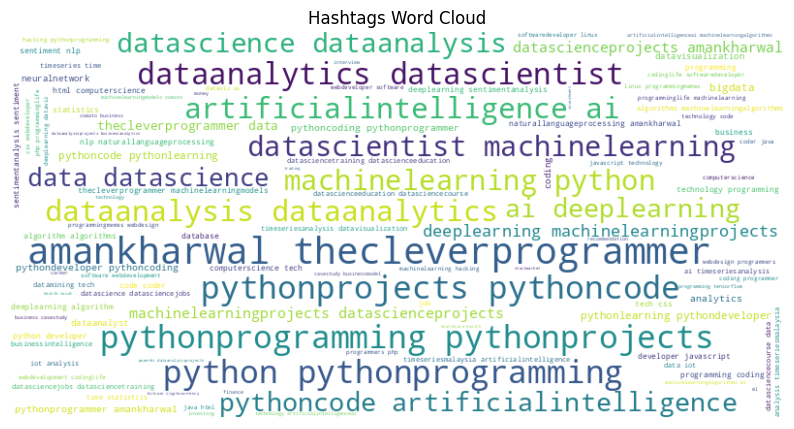

In [39]:
all_hashtags = ' '.join(df['Hashtags'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Hashtags Word Cloud')
plt.axis('off')
plt.show()


##Q.11: Have a look at the correlation between all the features.

<ipython-input-40-38624506e6fe>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



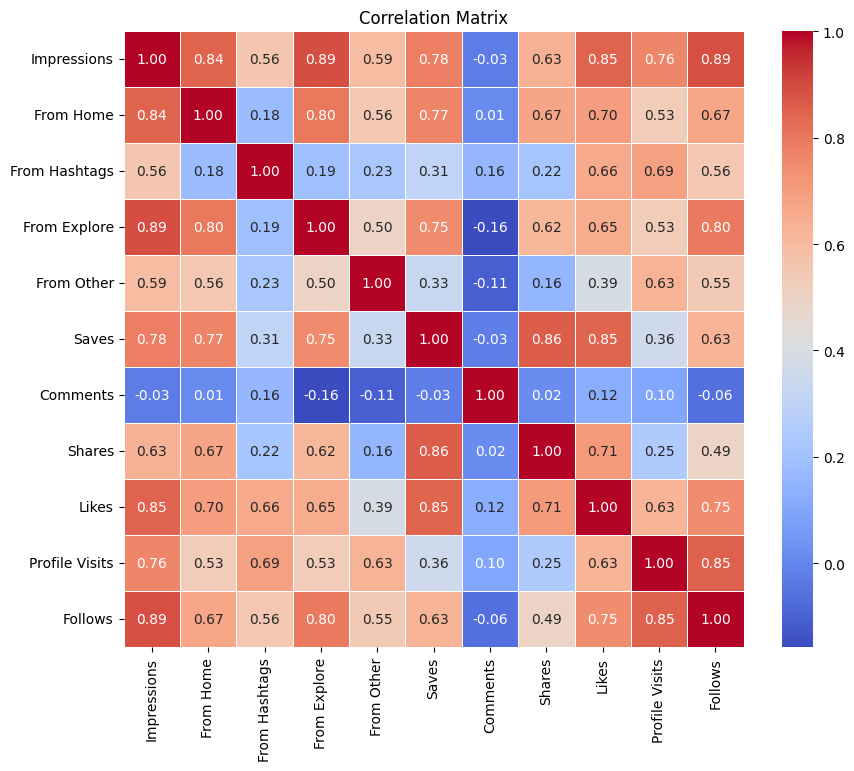

In [40]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


##Q.12: Havea look at the distribution of hashtags to see which hashtag is used the most in all the posts.

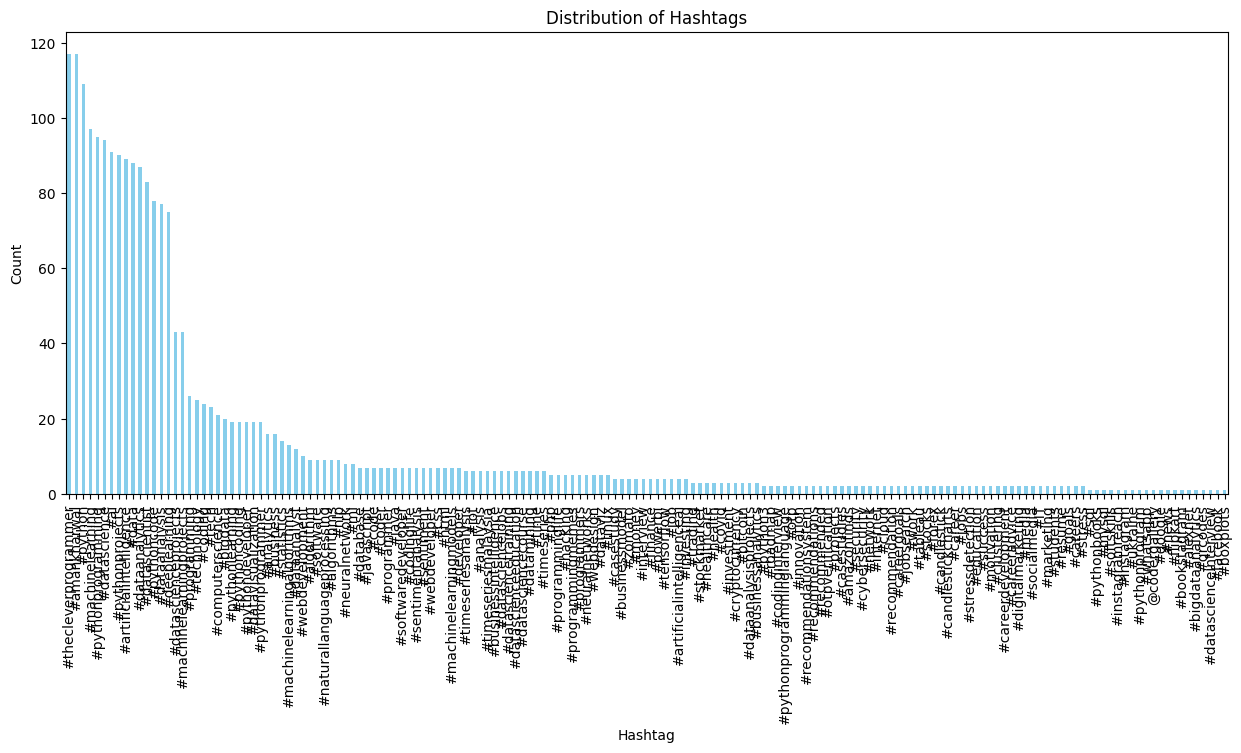

In [41]:
hashtags = df['Hashtags'].str.split()
all_hashtags = [item for sublist in hashtags for item in sublist]
hashtags_count = pd.Series(all_hashtags).value_counts()

plt.figure(figsize=(15, 6))
hashtags_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


##Q.13: Have a look at the distribution of likes and impressions received from the presence of each hashtag on the post.

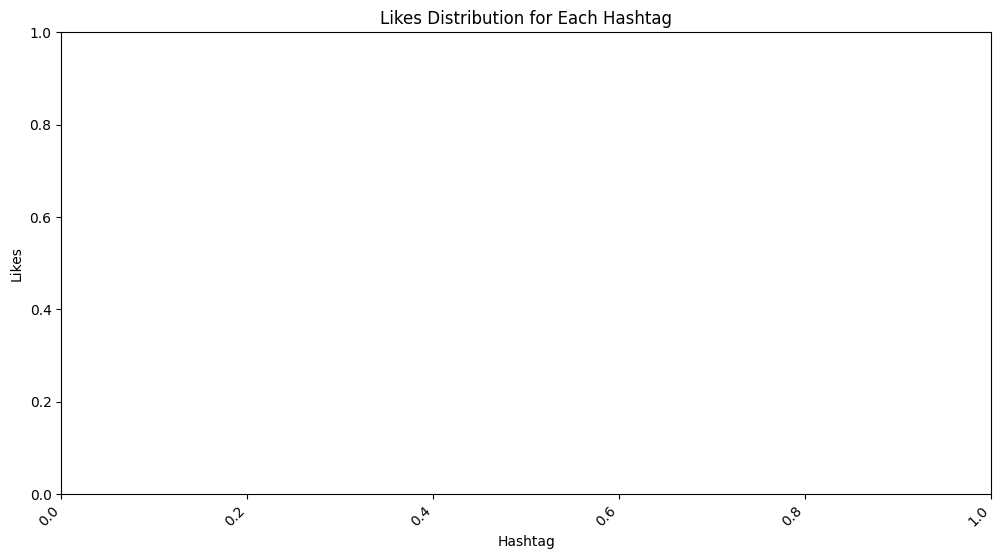

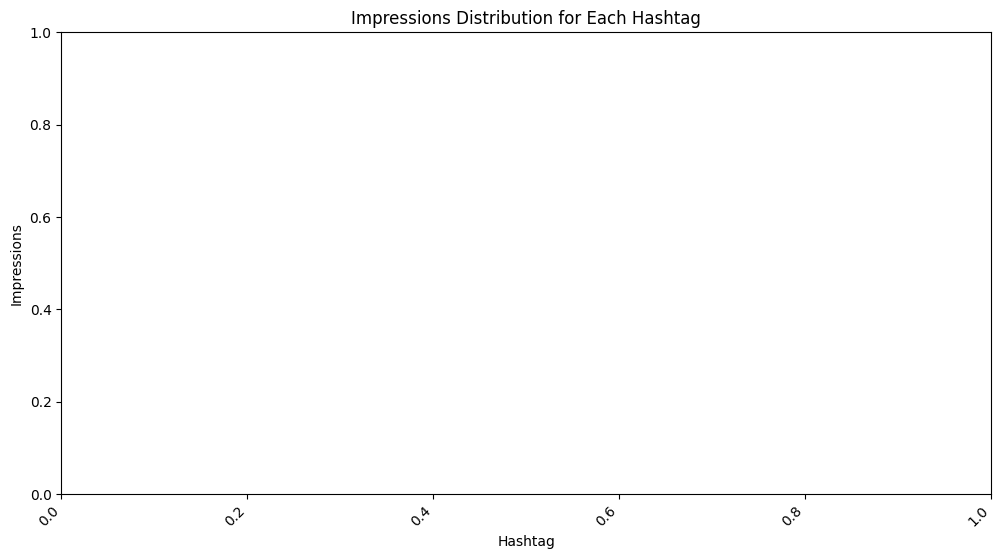

In [45]:
hashtag_data = pd.DataFrame(columns=['Hashtag', 'Likes', 'Impressions'])

for index, row in df.iterrows():

    hashtags = re.findall(r'#(\w+)', row['Caption'])

    for hashtag in hashtags:
        if hashtag in hashtag_data['Hashtag'].tolist():
            hashtag_data.loc[hashtag_data['Hashtag'] == hashtag, 'Likes'] += row['Likes']
            hashtag_data.loc[hashtag_data['Hashtag'] == hashtag, 'Impressions'] += row['Impressions']
        else:
            hashtag_data = hashtag_data.append({'Hashtag': hashtag,
                                                'Total Likes': row['Likes'],
                                                'Total Impressions': row['Impressions']},
                                                ignore_index=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Hashtag', y='Likes', data=hashtag_data, palette='coolwarm')
plt.title('Likes Distribution for Each Hashtag')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hashtag')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hashtag', y='Impressions', data=hashtag_data, palette='coolwarm')
plt.title('Impressions Distribution for Each Hashtag')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hashtag')
plt.ylabel('Impressions')
plt.show()


##Q.14: Write summary as per your observation.

The analysis provided insights into various aspects of the Instagram dataset, including:

*  Identification of column names and data types.
*  Examination of descriptive statistics to understand data distribution.
*  Checking for missing values to ensure data completeness.
*  Visualizing the distribution of impressions, likes, saves, and follows over time.
*  Analyzing the distribution of engagement sources to understand user interaction patterns.
*  Generating a word cloud to visualize popular hashtags.
*  Plotting the frequency of hashtags to identify commonly used ones.
*  Examining the distribution of likes and impressions for each hashtag to understand their impact on post engagement.